In [2]:
import pandas as pd

# Read the json file
df = pd.read_json('casas.json')

# Export the initial df to a csv file for easy inspection
df.to_csv('casas.csv', index=False)


In [3]:
# Visualize metadata from the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               919 non-null    object
 1   price             919 non-null    object
 2   col               919 non-null    object
 3   terreno           919 non-null    object
 4   recamaras         919 non-null    object
 5   banos             919 non-null    object
 6   estacionamientos  919 non-null    object
 7   descripcion       919 non-null    object
dtypes: object(8)
memory usage: 57.6+ KB


In [4]:
# Delete duplicated data
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 918
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               701 non-null    object
 1   price             701 non-null    object
 2   col               701 non-null    object
 3   terreno           701 non-null    object
 4   recamaras         701 non-null    object
 5   banos             701 non-null    object
 6   estacionamientos  701 non-null    object
 7   descripcion       701 non-null    object
dtypes: object(8)
memory usage: 49.3+ KB


In [5]:
# Extract the numeric portion from the 'terreno' column and store it in the new 'dimensiones' column
# (e.g. converts '625 mt^2' to '625')
df['dimensiones'] = df['terreno'].str.split().str[0]

# Delete the 'terreno' column as its useful information has already been transferred to 'dimensiones'
df = df.drop(columns=['terreno'])


In [6]:
# Display the first rows of the df to check that the 'dimensiones' column was correctly created
df.head()

,dir,price,col,recamaras,banos,estacionamientos,descripcion,dimensiones
0,Enrique Rebsamen 926,"Casas desde\nMN 9,040,000","Narvarte Poniente, Benito Juárez",3 rec.,No disponible,No disponible,Proyecto de 5 exclusivas residencias de 150 m²...,5
1,HELECHOS,"MN 64,000,000","Bosques de las Lomas, Cuajimalpa de Morelos",4 rec.,4 baños,8 estac.,Exclusiva residencia en una de las mejores cal...,623
2,Av las Flores 390,"MN 15,499,000","Las Águilas, Alvaro Obregón",3 rec.,3 baños,6 estac.,¡Tu nuevo hogar te espera en Av. Las Flores 39...,361
3,Sur 69 - A,"MN 8,900,000","Sinatel, Iztapalapa",4 rec.,4 baños,3 estac.,"Magnifica casa en venta de cuatro recamaras, s...",265
4,Jardines del Pedregal,"MN 24,750,000","Jardines del Pedregal, Alvaro Obregón",4 rec.,4 baños,4 estac.,¡Súper Oportunidad! Hermosa Casa en Condominio...,655


In [7]:
# Rename the 'price' column to 'precio'
df = df.rename(columns={'price': 'precio'})

In [8]:
# Clean the 'precio' column

# Identify rows where 'price' starts with 'MN ' or 'USD ' (valid price formats)
valid_prices = df['precio'].str.startswith(('MN ', 'USD '))

# Keep only the rows with valid price formats to ensure data consistency
df = df[valid_prices].copy()

# Remove extra information that appears after the '\n'
# as some price entries contain maintenance details
df['precio'] = df['precio'].str.split('\n').str[0]

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 1 to 918
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               694 non-null    object
 1   precio            694 non-null    object
 2   col               694 non-null    object
 3   recamaras         694 non-null    object
 4   banos             694 non-null    object
 5   estacionamientos  694 non-null    object
 6   descripcion       694 non-null    object
 7   dimensiones       694 non-null    object
dtypes: object(8)
memory usage: 48.8+ KB


,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones
1,HELECHOS,"MN 64,000,000","Bosques de las Lomas, Cuajimalpa de Morelos",4 rec.,4 baños,8 estac.,Exclusiva residencia en una de las mejores cal...,623
2,Av las Flores 390,"MN 15,499,000","Las Águilas, Alvaro Obregón",3 rec.,3 baños,6 estac.,¡Tu nuevo hogar te espera en Av. Las Flores 39...,361
3,Sur 69 - A,"MN 8,900,000","Sinatel, Iztapalapa",4 rec.,4 baños,3 estac.,"Magnifica casa en venta de cuatro recamaras, s...",265
4,Jardines del Pedregal,"MN 24,750,000","Jardines del Pedregal, Alvaro Obregón",4 rec.,4 baños,4 estac.,¡Súper Oportunidad! Hermosa Casa en Condominio...,655
5,Av. Hacienda de Mazatepec,"MN 11,600,000","Rinconada Coapa, Tlalpan",4 rec.,4 baños,3 estac.,Casa en venta con extensa área verde ubicada e...,520


In [10]:
# Turn usd prices to mxn

# Exchange rate
usd_to_mxn = 19.5

# Conversion function
def convert_to_mxn(precio):
    # Split the price string into the type of currency and the amount
    currency, amount = precio.split()

    # Remove commas for proper numeric conversion
    amount = float(amount.replace(',', ''))

    if currency == 'USD':
        amount *= usd_to_mxn

    # Returning 'amount' replaces the original price format (e.g. 'MN 19,200,000' or 'USD 2,000,000') 
    # in the 'precio' column with only the numeric value.
    return amount


# Apply conversion to the 'precio' column
df['precio'] = df['precio'].apply(convert_to_mxn)

In [11]:
# Verify the conversion worked
df['precio'].head(20)

1     64000000.0
2     15499000.0
3      8900000.0
4     24750000.0
5     11600000.0
6     12750000.0
7     12450000.0
8     12990000.0
9     34725000.0
10    19200000.0
11    15800000.0
12    33000000.0
13    42900000.0
14     4450000.0
15     8900000.0
16    12600000.0
17     9500000.0
18    13000000.0
19    70000000.0
20    11490000.0
Name: precio, dtype: float64

In [12]:
# Extract the 'alcaldia' value from the 'col' column and store it on its own column
# The final str.strip() removes any leading or trailing whitespace characters from the extracted value
df['alcaldia'] = df['col'].str.split(',').str[-1].str.strip()

# Keep only the neighborhood name in the 'col' column, since the 'alcaldía' value has been transferred
# The final str.strip() removes any leading or trailing whitespace characters from the extracted value
df['col'] = df['col'].str.split(',').str[0].str.strip()

In [13]:
df.head()

,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones,alcaldia
1,HELECHOS,64000000.0,Bosques de las Lomas,4 rec.,4 baños,8 estac.,Exclusiva residencia en una de las mejores cal...,623,Cuajimalpa de Morelos
2,Av las Flores 390,15499000.0,Las Águilas,3 rec.,3 baños,6 estac.,¡Tu nuevo hogar te espera en Av. Las Flores 39...,361,Alvaro Obregón
3,Sur 69 - A,8900000.0,Sinatel,4 rec.,4 baños,3 estac.,"Magnifica casa en venta de cuatro recamaras, s...",265,Iztapalapa
4,Jardines del Pedregal,24750000.0,Jardines del Pedregal,4 rec.,4 baños,4 estac.,¡Súper Oportunidad! Hermosa Casa en Condominio...,655,Alvaro Obregón
5,Av. Hacienda de Mazatepec,11600000.0,Rinconada Coapa,4 rec.,4 baños,3 estac.,Casa en venta con extensa área verde ubicada e...,520,Tlalpan


In [14]:
# Define misspelled 'alcaldia' names and their corrected versions 
# This accounts for common formatting issues such as missing accents or punctuation
# (e.g. 'Gustavo A Madero' -> 'Gustavo A. Madero')
alcaldia_corrections = {
    'Alvaro Obregon': 'Álvaro Obregón',
    'Alvaro Obregón': 'Álvaro Obregón',
    'Coyoacan': 'Coyoacán',
    'Tlahuac': 'Tláhuac',
    'Magdalena Contreras': 'La Magdalena Contreras',
    'Azcapotzalco': 'Azcapotzalco',
    'Gustavo A Madero': 'Gustavo A. Madero',
    'Cuauhtemoc': 'Cuauhtémoc'
}

# Apply the correction
df['alcaldia'] = df['alcaldia'].replace(alcaldia_corrections)

In [15]:
# List of valid 'alcaldia' values
valid_alcaldias = [
    'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos',
    'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
    'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'
]

# Check which entries in the alcaldia column aren't in this list
invalid_alcaldias = df[~df['alcaldia'].isin(valid_alcaldias)]

# See invalid 'alcaldia' values just one time no matter how many times they repeat
df.loc[~df['alcaldia'].isin(valid_alcaldias), 'alcaldia'].unique()

array(['Ciudad de México', 'Polanco', 'Olivar de los Padres',
       'No disponible', 'San Bartolo Ameyalco'], dtype=object)

In [16]:
# Keep only the rows with valid 'alcaldia' values
df = df[df['alcaldia'].isin(valid_alcaldias)].copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 1 to 918
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dir               664 non-null    object 
 1   precio            664 non-null    float64
 2   col               664 non-null    object 
 3   recamaras         664 non-null    object 
 4   banos             664 non-null    object 
 5   estacionamientos  664 non-null    object 
 6   descripcion       664 non-null    object 
 7   dimensiones       664 non-null    object 
 8   alcaldia          664 non-null    object 
dtypes: float64(1), object(8)
memory usage: 51.9+ KB


In [18]:
# Display the median house prices for each 'alcaldia'

# Group by 'alcaldia' and get the the median price
median_prices = df.groupby('alcaldia')['precio'].median()

# Display the median house prices for all 'alcaldias' from the most expensive to the least
print(f'Median price of houses by {median_prices.sort_values(ascending=False)}')

Median price of houses by alcaldia
Miguel Hidalgo            36000000.0
Álvaro Obregón            23000000.0
Cuajimalpa de Morelos     19149000.0
Cuauhtémoc                17245000.0
Coyoacán                  14690000.0
Tlalpan                   13700000.0
Benito Juárez             13250000.0
La Magdalena Contreras    12600000.0
Venustiano Carranza       10100000.0
Gustavo A. Madero          6400000.0
Iztacalco                  6000000.0
Azcapotzalco               5750000.0
Xochimilco                 4955000.0
Iztapalapa                 4490000.0
Tláhuac                    3871158.5
Name: precio, dtype: float64


In [19]:
# Clean the 'recamaras', 'banos', and 'estacionamientos' columns by keeping just the numeric values
# (e.g. converts '4 baños' to '4', '3 rec.' to '3' and 'No disponible' to 'No' and then Nan)

import numpy as np

def clean_numeric(col):
    cleaned = col.str.strip().str.split().str[0].str.replace('.', '', regex=False)

    # Replace 'No' with np.nan
    cleaned = cleaned.replace('No', np.nan)
    return cleaned

df['recamaras'] = clean_numeric(df['recamaras'])
df['banos'] = clean_numeric(df['banos'])
df['estacionamientos'] = clean_numeric(df['estacionamientos'])

In [20]:
# Convert to numeric (handle NaN values)
df[['recamaras', 'banos', 'estacionamientos']] = df[['recamaras', 'banos', 'estacionamientos']].apply(pd.to_numeric)

# Calculate medians
medians = df[['recamaras', 'banos', 'estacionamientos']].median()

# Replace NaN with medians
df.fillna(medians, inplace=True)

# Convert to integer type
df[['recamaras', 'banos', 'estacionamientos']] = df[['recamaras', 'banos', 'estacionamientos']].astype('Int64')


In [21]:
# Show all the different values for each of the columns to verify the process worked
print(df['recamaras'].unique())
print(df['banos'].unique())
print(df['estacionamientos'].unique())

<IntegerArray>
[4, 3, 2, 6, 5, 7, 8, 9, 15, 20, 1, 10, 12]
Length: 13, dtype: Int64
<IntegerArray>
[4, 3, 2, 6, 5, 7, 11, 1, 10, 15, 8]
Length: 11, dtype: Int64
<IntegerArray>
[8, 6, 3, 4, 2, 19, 5, 7, 1, 10, 12, 15, 20, 18, 9]
Length: 15, dtype: Int64


In [22]:
# We can see the 'dimensiones' column is currently stored as an object type
# We need to convert it to integers for numerical operations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 1 to 918
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dir               664 non-null    object 
 1   precio            664 non-null    float64
 2   col               664 non-null    object 
 3   recamaras         664 non-null    Int64  
 4   banos             664 non-null    Int64  
 5   estacionamientos  664 non-null    Int64  
 6   descripcion       664 non-null    object 
 7   dimensiones       664 non-null    object 
 8   alcaldia          664 non-null    object 
dtypes: Int64(3), float64(1), object(5)
memory usage: 53.8+ KB


In [23]:
# Converts the column to numeric values, replacing non numeric values, if any, with nan
df['dimensiones'] = pd.to_numeric(df['dimensiones'], errors='coerce').astype('Int64')

In [24]:
df.info() # Verify the conversion worked properly

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 1 to 918
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dir               664 non-null    object 
 1   precio            664 non-null    float64
 2   col               664 non-null    object 
 3   recamaras         664 non-null    Int64  
 4   banos             664 non-null    Int64  
 5   estacionamientos  664 non-null    Int64  
 6   descripcion       664 non-null    object 
 7   dimensiones       664 non-null    Int64  
 8   alcaldia          664 non-null    object 
dtypes: Int64(4), float64(1), object(4)
memory usage: 54.5+ KB


In [25]:
# Create column price per square meter
df['precio_por_mt2'] = df['precio'] / df['dimensiones']

# Groups by 'alcaldia' and calculates the median price per square meter for each
median_sqm_price_per_alcaldia = df.groupby('alcaldia')['precio_por_mt2'].median()

# Merge the median values back into the original DataFrame
df = df.merge(median_sqm_price_per_alcaldia.rename('precio_promedio_por_mt2_por_alcaldia'), on='alcaldia', how='left')


In [26]:
# Verify the new columns were created successfully
df.head(10)

,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones,alcaldia,precio_por_mt2,precio_promedio_por_mt2_por_alcaldia
0,HELECHOS,64000000.0,Bosques de las Lomas,4,4,8,Exclusiva residencia en una de las mejores cal...,623,Cuajimalpa de Morelos,102728.731942,44286.77014
1,Av las Flores 390,15499000.0,Las Águilas,3,3,6,¡Tu nuevo hogar te espera en Av. Las Flores 39...,361,Álvaro Obregón,42933.518006,42135.207497
2,Sur 69 - A,8900000.0,Sinatel,4,4,3,"Magnifica casa en venta de cuatro recamaras, s...",265,Iztapalapa,33584.90566,18823.529412
3,Jardines del Pedregal,24750000.0,Jardines del Pedregal,4,4,4,¡Súper Oportunidad! Hermosa Casa en Condominio...,655,Álvaro Obregón,37786.259542,42135.207497
4,Av. Hacienda de Mazatepec,11600000.0,Rinconada Coapa,4,4,3,Casa en venta con extensa área verde ubicada e...,520,Tlalpan,22307.692308,32638.888889
5,CERRADA DE BEZAREZ,12750000.0,Lomas de Bezares,3,3,3,Muy bonita casa dentro de un fraccionamiento c...,262,Miguel Hidalgo,48664.122137,58348.509934
6,COSCOMATE,12450000.0,Bosques de Tetlameya,4,3,2,Bosques de Tetlameya se conoce por ser una col...,300,Coyoacán,41500.0,47764.786795
7,BERLIN,12990000.0,Olímpica,2,2,2,Esta casa tiene espacios increíbles y opción a...,207,Coyoacán,62753.623188,47764.786795
8,Cerrada Salvador Novo,34725000.0,Barrio Santa Catarina,4,3,6,Esta impresionante casa se encuentra ubicada e...,727,Coyoacán,47764.786795,47764.786795
9,Av. San Bernabé,19200000.0,San Jerónimo Lídice,3,4,6,Esta hermosa casa súper moderna combina arquit...,392,La Magdalena Contreras,48979.591837,29268.292683


In [27]:
# Let's create some additional features that might help the model
df['banos_por_habitacion'] = df['banos'] / df['recamaras']

df['habitaciones_totales'] = df['banos'] + df['recamaras']

In [28]:
# Separar las características de la etiqueta
# Características (X), etiqueta (y)
# We'll remove the 'dir' and 'descripcion', 'col' columns as they contain unstructured text
df = df.drop(['dir', 'descripcion', 'col'], axis=1)

df = pd.get_dummies(df, columns=['alcaldia'])


X = df.drop(["precio"], axis=1)
y = df["precio"]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   precio                                664 non-null    float64
 1   recamaras                             664 non-null    Int64  
 2   banos                                 664 non-null    Int64  
 3   estacionamientos                      664 non-null    Int64  
 4   dimensiones                           664 non-null    Int64  
 5   precio_por_mt2                        664 non-null    Float64
 6   precio_promedio_por_mt2_por_alcaldia  664 non-null    Float64
 7   banos_por_habitacion                  664 non-null    Float64
 8   habitaciones_totales                  664 non-null    Int64  
 9   alcaldia_Azcapotzalco                 664 non-null    bool   
 10  alcaldia_Benito Juárez                664 non-null    bool   
 11  alcaldia_Coyoacán  

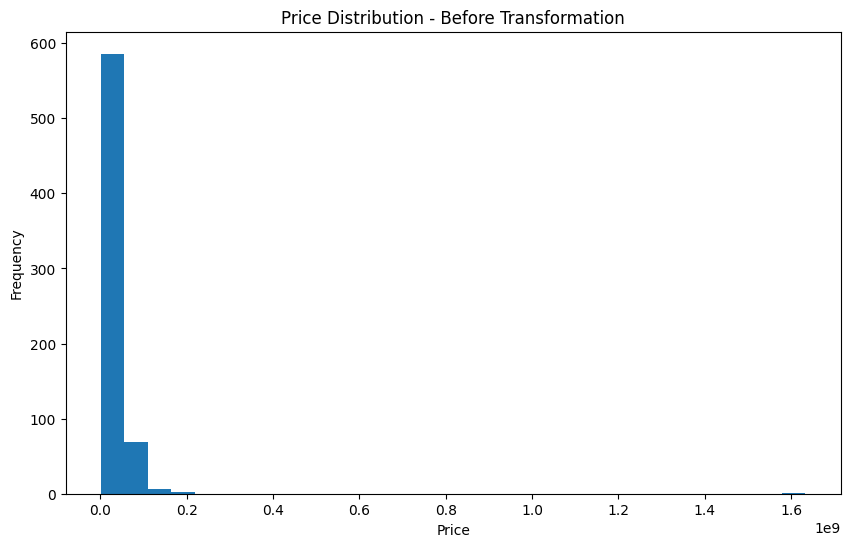

In [30]:
# First, let's look at the distribution of prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['precio'], bins=30)
plt.title('Price Distribution - Before Transformation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

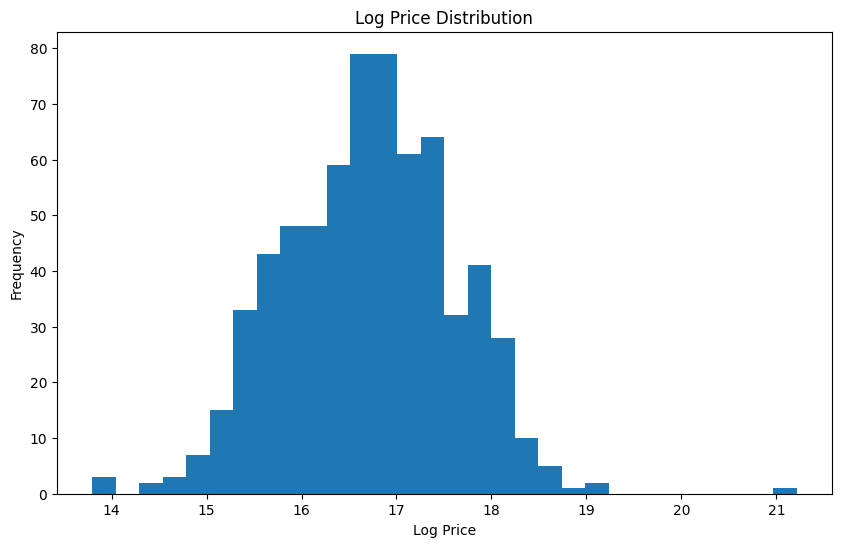

In [31]:
# Apply log transformation to price
# A log transformation compresses large values and spreads out smaller ones, 
# creating a more symmetrically distributed dataset that aligns better with linear regression assumptions

# If the dataset contains values across different scales (e.g. price vs. square meters), logs help normalize these differences,
# making model coefficients more stable and reducing the impact of outliers

df['log_precio'] = np.log1p(df['precio'])

# Show distribution after the log transformation
plt.figure(figsize=(10, 6))
plt.hist(df['log_precio'], bins=30)
plt.title('Log Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Identificar todas las columnas dummy de alcaldías
alcaldia_columns = [col for col in df.columns if col.startswith('alcaldia_')]

X = df[['recamaras', 'banos', 'estacionamientos', 'dimensiones'] + alcaldia_columns]
y = df['log_precio']

In [33]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [34]:
X_training.shape

(531, 19)

In [35]:
y_training.shape

(531,)

In [36]:
X_test.shape

(133, 19)

In [37]:
y_test.shape

(133,)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_training, y_training)

LinearRegression()

In [39]:
print(model.score(X_training, y_training))
print(model.score(X_test, y_test))

0.5021069898349474
0.5642109427913273


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   precio                                664 non-null    float64
 1   recamaras                             664 non-null    Int64  
 2   banos                                 664 non-null    Int64  
 3   estacionamientos                      664 non-null    Int64  
 4   dimensiones                           664 non-null    Int64  
 5   precio_por_mt2                        664 non-null    Float64
 6   precio_promedio_por_mt2_por_alcaldia  664 non-null    Float64
 7   banos_por_habitacion                  664 non-null    Float64
 8   habitaciones_totales                  664 non-null    Int64  
 9   alcaldia_Azcapotzalco                 664 non-null    bool   
 10  alcaldia_Benito Juárez                664 non-null    bool   
 11  alcaldia_Coyoacán  

In [42]:
# Estos son los datos de la casa que quieres predecir
datos_casa = {
    'recamaras': 4,
    'banos': 4,
    'estacionamientos': 5,
    'dimensiones': 5000
}

alcaldias = [
    'alcaldia_Azcapotzalco',
    'alcaldia_Benito Juárez',
    'alcaldia_Coyoacán',
    'alcaldia_Cuajimalpa de Morelos',
    'alcaldia_Cuauhtémoc',
    'alcaldia_Gustavo A. Madero',
    'alcaldia_Iztacalco',
    'alcaldia_Iztapalapa',
    'alcaldia_La Magdalena Contreras',
    'alcaldia_Miguel Hidalgo',
    'alcaldia_Tlalpan',
    'alcaldia_Tláhuac',
    'alcaldia_Venustiano Carranza',
    'alcaldia_Xochimilco',
    'alcaldia_Álvaro Obregón'
]


# Ahora creas un diccionario con las columnas dummy de alcaldía en 0
for alcaldia in alcaldias:
    datos_casa[alcaldia] = 0

# Y activas la alcaldía correcta
datos_casa['alcaldia_Tlalpan'] = 1

# Conviertes a DataFrame
df_casa = pd.DataFrame([datos_casa])

# Aseguras que el orden de columnas es el mismo que X
df_casa = df_casa[X.columns]

# Ahora predices
prediccion_log_precio = model.predict(df_casa)

# Si quieres obtener el precio en lugar del logaritmo
precio_estimado = np.exp(prediccion_log_precio)[0]

print(f'${precio_estimado:,.0f}')

$27,960,562


In [39]:
# Since we applied the log transformation to the prices in order to help the model
# When making predictions, we must apply exp() to convert the predicted log prices back to actual prices

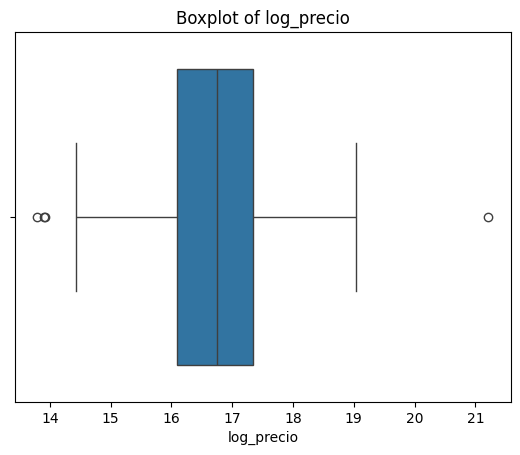

In [121]:
import seaborn as sns

# Visualize the distribution of the 'log_precio' column to identify the outliers
sns.boxplot(x=df['log_precio'])
plt.title('Boxplot of log_precio')
plt.show()

In [122]:
# Use the IQR method to detect outliers
Q1 = df['log_precio'].quantile(0.25)
Q3 = df['log_precio'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers (typically 1.5 * IQR from quartiles)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask of non-outliers
mask = (df['log_precio'] >= lower_bound) & (df['log_precio'] <= upper_bound)

# Create a dataframe without the detected outliers
df_filtered = df[mask]

print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {df_filtered.shape[0]}")
print(f"Number of outliers removed: {df.shape[0] - df_filtered.shape[0]}")

Original dataset size: 664
Filtered dataset size: 660
Number of outliers removed: 4


In [171]:
df.to_csv("new_casas.csv", index=False)